# Graduate Admissions Prediction

In this project, we predict the chances of admission for students applying to graduate programs based on various features such as GRE score, TOEFL score, University Rating, etc.

We will use the [Graduate Admission Prediction Dataset](https://www.kaggle.com/mohansacharya/graduate-admissions) from Kaggle.

### 1. Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

data = pd.read_csv('../../data/003/Admission_predict_Ver1.1.csv')
data.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


The dataset contains features such as GRE Score, TOEFL Score, CGPA, and the Chance of Admission. We will drop the `Serial No.` column as it's not relevant to prediction, and the target variable will be `Chance of Admit`.


### 2. Data Exploration 

In [3]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [4]:
target=data['Chance of Admit ']
data.drop(['Serial No.','Chance of Admit '],axis=1,inplace=True)

<Axes: >

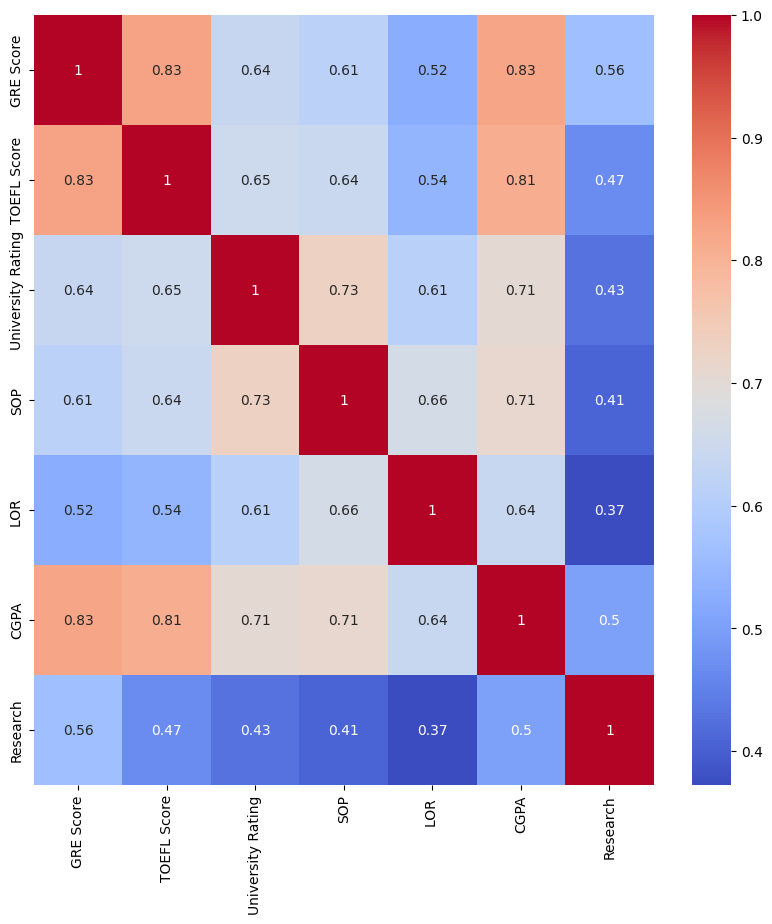

In [5]:
corr_mat=data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat,cmap='coolwarm',annot=True)

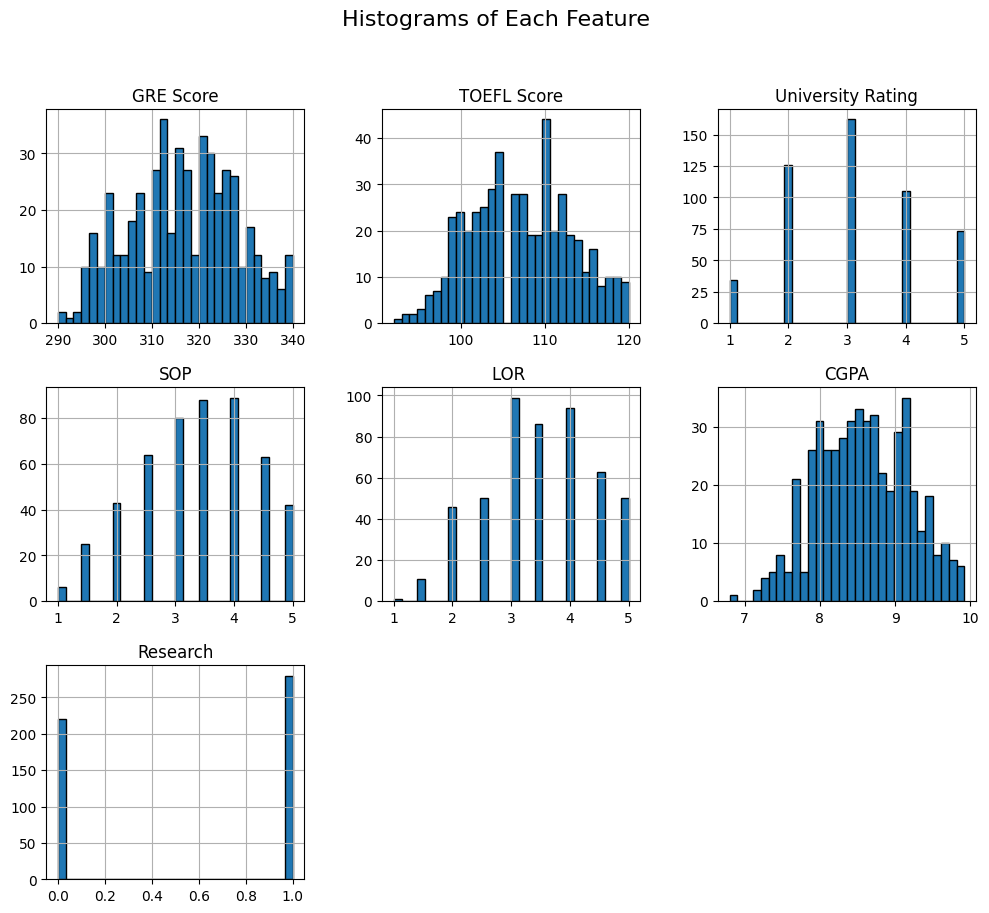

In [6]:
data.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle('Histograms of Each Feature', fontsize=16)
plt.show()

### 3. Data Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
data1=pd.DataFrame(scaler.fit_transform(data),columns=data.columns)
data1.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152


### 4. Train-Test Split

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(data1,target,test_size=0.2,random_state=42)


In [10]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (400, 7)
X_test: (100, 7)
y_train: (400,)
y_test: (100,)


In [11]:
y_test

361    0.93
73     0.84
374    0.39
155    0.77
104    0.74
       ... 
347    0.42
86     0.72
75     0.72
438    0.67
15     0.54
Name: Chance of Admit , Length: 100, dtype: float64

### 5. Random Forest Regression

In [12]:
from sklearn.ensemble import RandomForestRegressor 
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)


In [13]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, explained_variance_score

In [14]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

# Output all metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")
print(f"Explained Variance Score (EVS): {evs}")

Mean Absolute Error (MAE): 0.04350099999999997
Mean Squared Error (MSE): 0.004281497499999999
Root Mean Squared Error (RMSE): 0.06543315291196046
R-squared (R²): 0.7906358190709047
Mean Absolute Percentage Error (MAPE): 6.99%
Explained Variance Score (EVS): 0.7909732825916871


The Random Forest Regressor model's performance is evaluated using multiple regression metrics such as RMSE, R², and MAE. The R² score of the model is *0.79*, indicating the model's accuracy in predicting admissions chances.


### 6. Model Evaluation: Actual vs Predicted

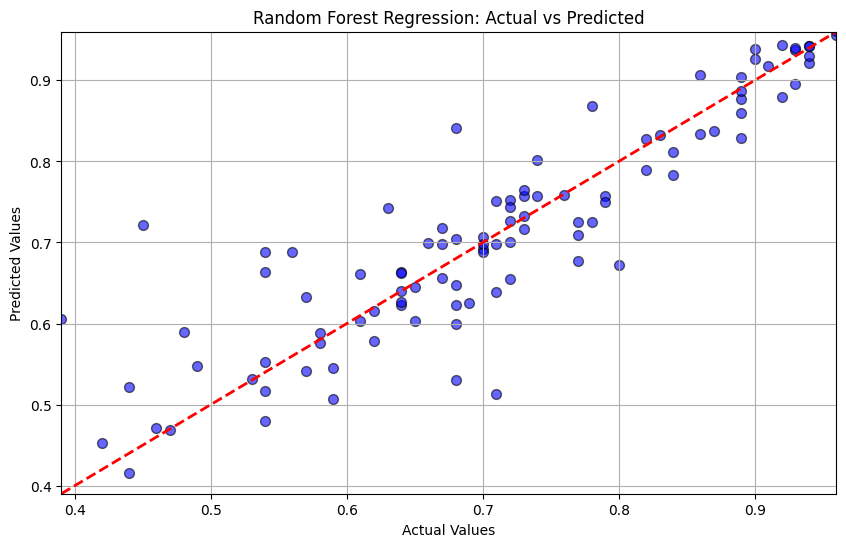

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, edgecolors='k', s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Ideal line
plt.title('Random Forest Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()
plt.show()

### 8. Feature Importance

In [18]:
# Display feature importances
importances = rfr.feature_importances_
print("Feature Importances:", importances)

# Identify the most important feature
most_important = np.argmax(importances)
print("Most important feature:", data1.columns[most_important])

Feature Importances: [0.16790793 0.03436065 0.01372515 0.02650546 0.02483043 0.71982079
 0.01284958]
Most important feature: CGPA


the most important feature in the student admision is CGPA score

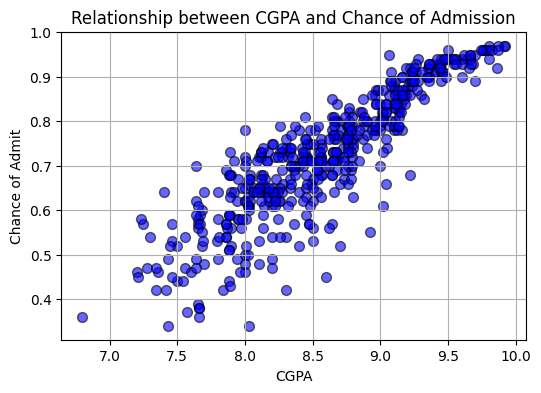

In [19]:
plt.figure(figsize=(6, 4))
plt.scatter(data['CGPA'], target, color='blue', alpha=0.6, edgecolors='k', s=50)
plt.ylabel('Chance of Admit')
plt.xlabel('CGPA')
plt.title("Relationship between CGPA and Chance of Admission")
plt.grid()
plt.show()

This plot illustrates the positive correlation between CGPA and the chances of admission. As CGPA increases, the chance of being admitted to graduate programs also increases.

### 9. Conclustion 

In this project, we explored how different factors affect a student's chance of admission to graduate programs. Using Random Forest Regressor, we found that CGPA is the most important feature in predicting the admission chances.